In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.optimizers import SGD, Adam
import cv2

In [75]:
df = pd.read_csv("handwritten.csv")

In [76]:
df.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df.shape

(372450, 785)

In [78]:
#spliting datafram into images and their corresponding labels
X = df.drop('0',axis='columns')   #image 
y = df['0']    # lables

In [79]:
0#splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)

(297960, 784)


In [80]:
#reshaping images into 28*28 matrix each coordinate representing pixel of image
X_train = np.reshape(X_train.values,(X_train.shape[0],28,28))
X_test = np.reshape(X_test.values,(X_test.shape[0],28,28))

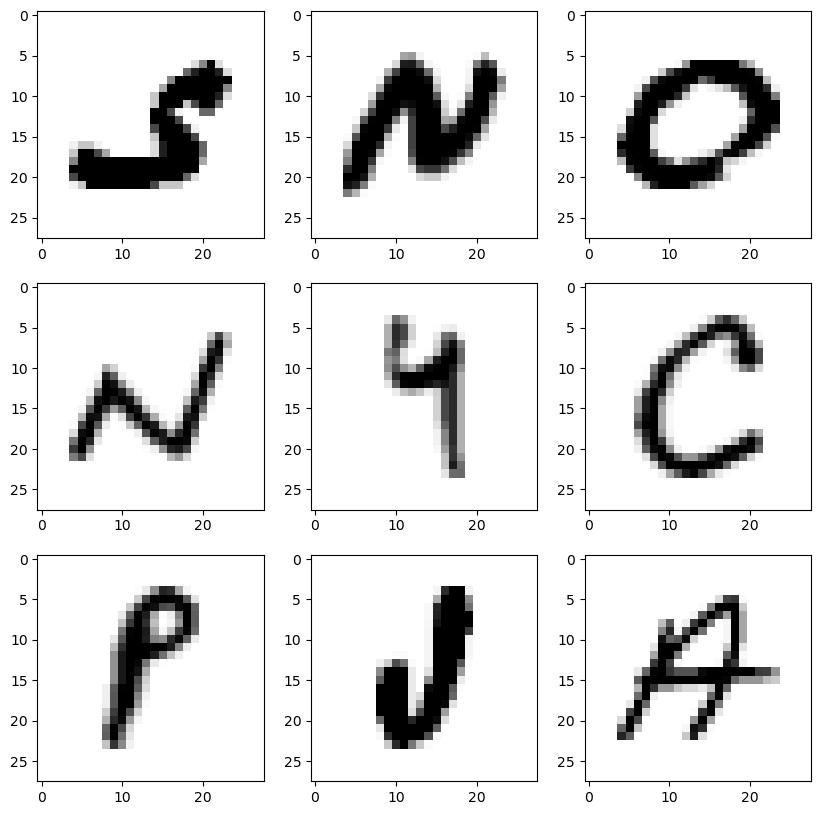

In [81]:
#Shuffling the first 100 images from X_train
shuffled = shuffle(X_train[:100])

fig, ax = plt.subplots(3,3, figsize=(10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuffled[i],(28,28)), cmap = "Greys")
plt.show()

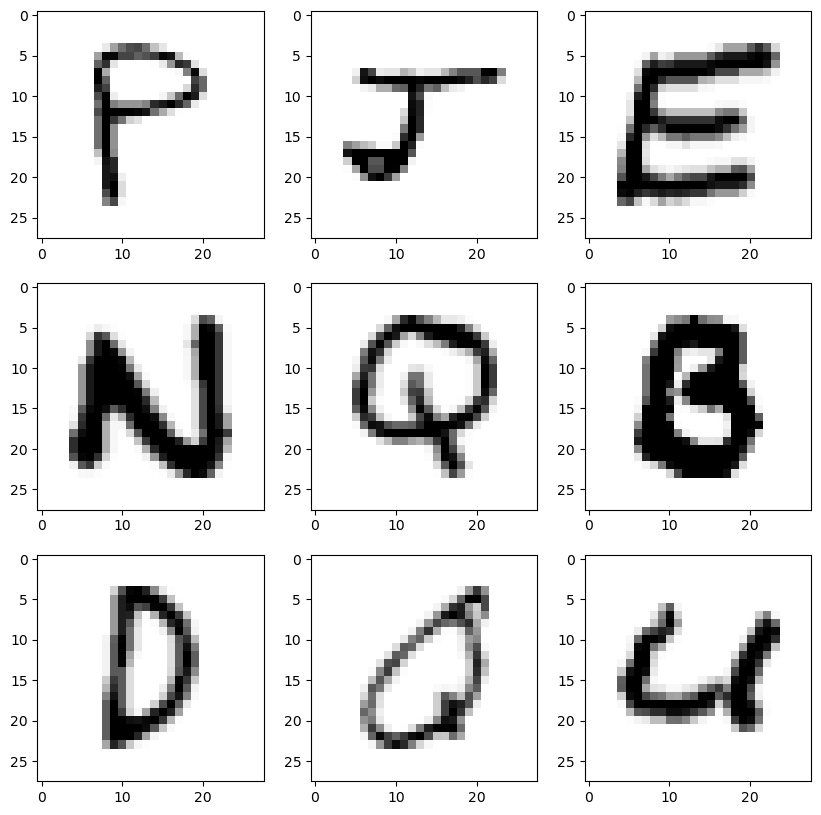

In [82]:
#Shuffling the first 100 images from X_test
shuffled = shuffle(X_test[:100])

fig, ax = plt.subplots(3,3, figsize=(10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuffled[i],(28,28)), cmap = "Greys")
plt.show()

In [83]:
#Reshaping the training and testing data again so that it can be put in the model.....

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print(X_train.shape)
print(X_test.shape)

(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [84]:
#Converting the labels into categorical values using one hot encoding

y_train_OHE = to_categorical(y_train, num_classes = 26, dtype='int')
y_test_OHE = to_categorical(y_test, num_classes = 26, dtype='int')
print(y_train_OHE.shape)
print(y_test_OHE.shape)

(297960, 26)
(74490, 26)


In [92]:
#CNN Model....

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3) ,activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))

model.add(Dense(128,activation='relu'))
model.add(Dense(26,activation='softmax'))

In [93]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [94]:
model_train = model.fit(X_train,y_train_OHE, epochs=1, validation_data = (X_test,y_test_OHE))

9312/9312 [==============================] - 117s 13ms/step - loss: 0.1699 - accuracy: 0.9542 - val_loss: 0.0847 - val_accuracy: 0.9765


In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [96]:
print("The validation(testing) accuracy is :", model_train.history['val_accuracy'])
print("The training accuracy is :", model_train.history['accuracy'])
print("The validation(testing) loss is :", model_train.history['val_loss'])
print("The training loss is :", model_train.history['loss'])

The validation(testing) accuracy is : [0.9765471816062927]
The training accuracy is : [0.9541582465171814]
The validation(testing) loss is : [0.08471644669771194]
The training loss is : [0.1699046939611435]


In [100]:
# Now making model predictions on test data

prediction = model.predict(X_test[:9])
print(X_test.shape)

1/1 [==============================] - 0s 11ms/step
(74490, 28, 28, 1)


In [105]:
letters = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [ ]:
# Prediction on external image...

img = cv2.imread(r'A.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = letters[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)


while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()